# 1 Images processing

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread(r'test_images/1-1629722410.jpg') # one photo of Mbappe
img.shape

(675, 1200, 3)

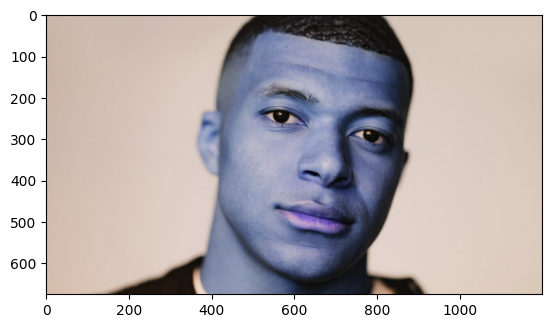

In [3]:
plt.imshow(img)
plt.show()


In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(675, 1200)

In [5]:
gray

array([[184, 184, 184, ..., 194, 194, 194],
       [184, 184, 184, ..., 194, 194, 194],
       [184, 184, 184, ..., 194, 194, 194],
       ...,
       [186, 186, 186, ..., 198, 198, 198],
       [186, 186, 186, ..., 198, 198, 198],
       [186, 186, 186, ..., 198, 198, 198]], dtype=uint8)

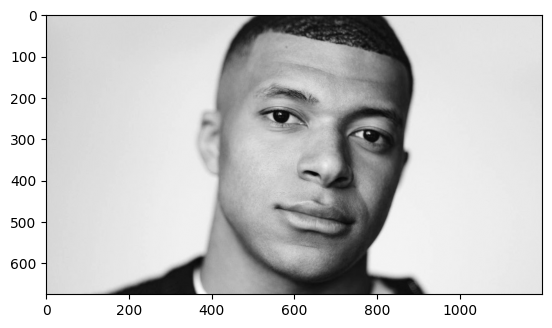

In [6]:
plt.imshow(gray, cmap='gray')
plt.show()

# 2 Detecting face and eyes

In [7]:
# detect face with openCV
# downloaded cascets from opencv to openCV folder

In [8]:
face_cascade = cv2.CascadeClassifier(r'opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'opencv/haarcascade_eye.xml')


In [9]:
faces = face_cascade.detectMultiScale(gray)
faces

array([[418,  58, 518, 518]])

In [10]:
(x,y,w,h) = faces [0]
x,y,w,h

(418, 58, 518, 518)

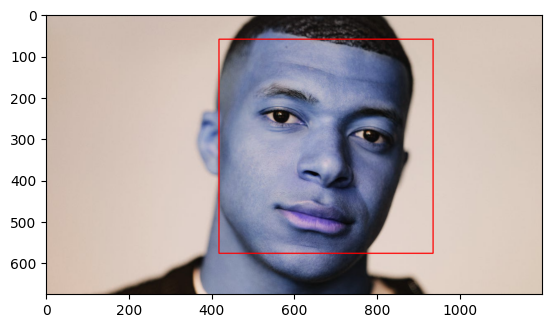

In [11]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)
plt.show()

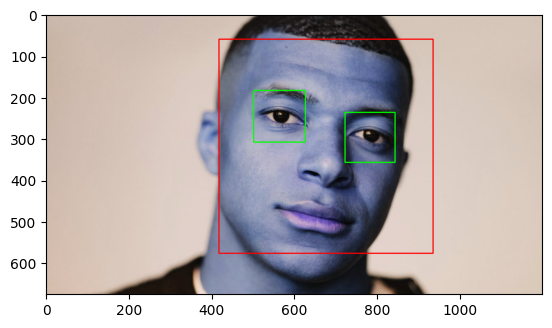

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [13]:
# Cropped image of the face

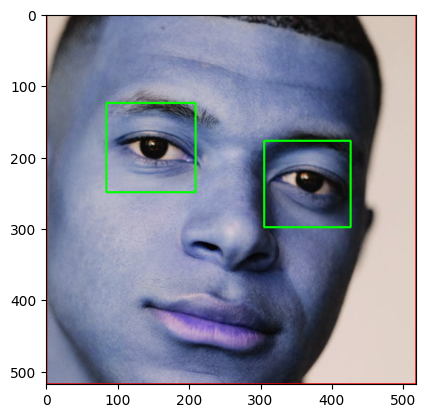

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [15]:
# function which gets an image and returns cropped face if 2 eyes detected
def get_cropped_image_if_2_eyes(image_path):
    # img = cv2.imread(image_path) # doesn't work for cyrillic / exotic encodings
    img = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    try: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except: 
        gray = img # if already is gray
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    roi_color_list = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_color_list.append(roi_color)
    if len(roi_color_list) > 0:
        return roi_color_list

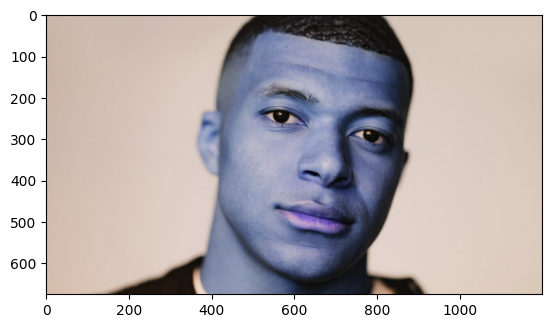

In [16]:
# test the fcn
original_image = cv2.imread(r'test_images/1-1629722410.jpg')
plt.imshow(original_image)
plt.show()

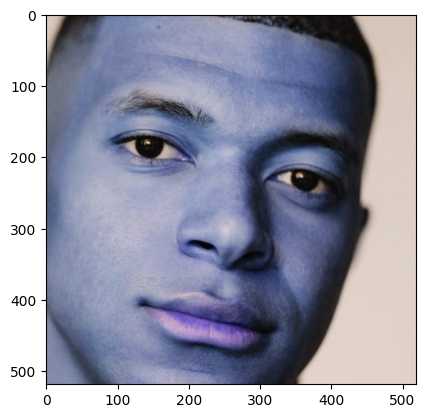

In [17]:
cropped_img = get_cropped_image_if_2_eyes(r'test_images/1-1629722410.jpg')
plt.imshow(cropped_img[0])
plt.show()

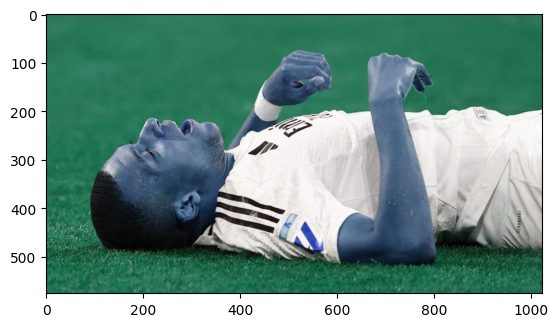

In [18]:
org_image_obstructed =  cv2.imread(r'test_images/905669568_251350184_1024x576.jpg')
plt.imshow(org_image_obstructed)
plt.show()

In [19]:
cropped_img_obstructed = get_cropped_image_if_2_eyes(r'test_images/905669568_251350184_1024x576.jpg')
cropped_img_obstructed


In [20]:
# empty result

# 3 Making a cropped dataset

In [21]:
# Paths to data
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [22]:
# scan folders with dataset
import os
img_dirs = []
for item in os.scandir(path_to_data):
    if item.is_dir() and item.path != './dataset/cropped':
        img_dirs.append(item.path)
img_dirs

['./dataset/ekaterina gamova',
 './dataset/fedor yemelyanenko',
 './dataset/kylian mbappe',
 './dataset/maria sharapova',
 './dataset/yusuf dikec']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
# generating cropped images in separate directory
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    cropped_folder = path_to_cr_data + celebrity_name
    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
    cropped_image_dirs.append(cropped_folder)
    print("Generating cropped images in folder: ",cropped_folder)
    for entry in os.scandir(img_dir):
        # print(entry.path)
        roi_color_list = get_cropped_image_if_2_eyes(entry.path)
        if roi_color_list is not None:
            for roi_color in roi_color_list:
                cropped_file_name = celebrity_name + str(count) + ".png" 
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Generating cropped images in folder:  ./dataset/cropped/ekaterina gamova
Generating cropped images in folder:  ./dataset/cropped/fedor yemelyanenko
Generating cropped images in folder:  ./dataset/cropped/kylian mbappe
Generating cropped images in folder:  ./dataset/cropped/maria sharapova
Generating cropped images in folder:  ./dataset/cropped/yusuf dikec


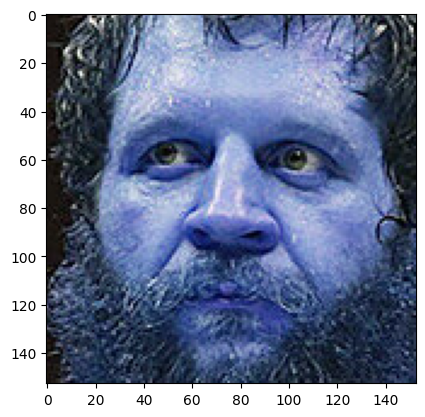

In [27]:
# now I clean manually all images referring not to our person, like that:
img = cv2.imdecode(np.fromfile(r'./dataset/cropped/fedor yemelyanenko/fedor yemelyanenko9.png', dtype=np.uint8), cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

In [28]:
# It's Alexander Yemelyanenko, Fedor's brother

In [29]:
cropped_image_dirs

['./dataset/cropped/ekaterina gamova',
 './dataset/cropped/fedor yemelyanenko',
 './dataset/cropped/kylian mbappe',
 './dataset/cropped/maria sharapova',
 './dataset/cropped/yusuf dikec']

In [30]:
# Fill the dict
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ekaterina gamova': ['./dataset/cropped/ekaterina gamova\\ekaterina gamova1.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova10.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova11.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova13.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova19.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova2.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova20.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova22.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova23.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova24.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova25.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova27.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova28.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova3.png',
  './dataset/cropped/ekaterina gamova\\ekaterina gamova30.png',
  './dataset/cropped/ek

In [31]:
# assign numbers to our celebrities
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ekaterina gamova': 0,
 'fedor yemelyanenko': 1,
 'kylian mbappe': 2,
 'maria sharapova': 3,
 'yusuf dikec': 4}

# 4 Image transformation

In [32]:
# Wavelet transformation
import pywt

In [33]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    try:
        imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    except:
        pass
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

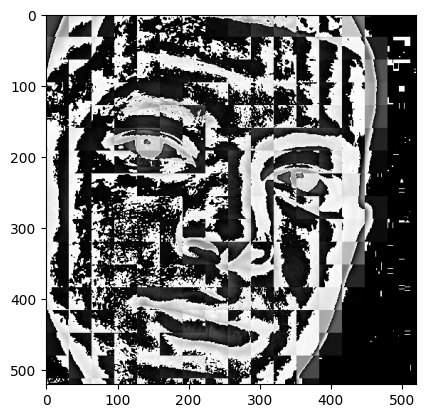

In [34]:
im_har = w2d(cropped_img[0],'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [35]:
# Vertically stack the raw and wavelet-transformed dicts

In [36]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [37]:
len(X[0])

4096

In [38]:
32*32*3 + 32*32

4096

In [39]:
X[0]

array([[168],
       [179],
       [181],
       ...,
       [244],
       [158],
       [247]], dtype=uint8)

In [40]:
y[0]

0

In [41]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(237, 4096)

# 5 Model

In [42]:
# model training
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) # random parameters, tune them later
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7166666666666667

In [44]:
print ('0.6 -> 0.71 after making a bigger dataset')

0.6 -> 0.71 after making a bigger dataset


In [45]:
len(X_test)

60

In [46]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       1.00      0.71      0.83         7
           2       1.00      0.46      0.63        13
           3       0.65      0.83      0.73        24
           4       0.83      1.00      0.91         5

    accuracy                           0.72        60
   macro avg       0.81      0.73      0.74        60
weighted avg       0.77      0.72      0.71        60



In [47]:
print(class_dict)

{'ekaterina gamova': 0, 'fedor yemelyanenko': 1, 'kylian mbappe': 2, 'maria sharapova': 3, 'yusuf dikec': 4}


In [48]:
# Finding a better model

In [61]:
#!pip install lightgbm

In [106]:
#!pip install numpy==1.26.4 --force-reinstall

In [107]:
#!pip install pandas==2.2.1 --force-reinstall

In [62]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
import lightgbm as lgb

In [74]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,20,30,50,70,90,120]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    # 'lgb': {
    #     'model': lgb ,
    #     'params': {}
    # }
    # , 
    'catboost' : {
        'model': CatBoostClassifier(),
        'params': {
            #'catboostclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
        } 
     }
}

In [75]:
%%time
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=7, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Learning rate set to 0.071854
0:	learn: 1.5825387	total: 830ms	remaining: 13m 49s
1:	learn: 1.5639521	total: 1.37s	remaining: 11m 21s
2:	learn: 1.5455754	total: 1.94s	remaining: 10m 45s
3:	learn: 1.5272382	total: 2.51s	remaining: 10m 26s
4:	learn: 1.5029458	total: 3.06s	remaining: 10m 10s
5:	learn: 1.4800849	total: 3.68s	remaining: 10m 9s
6:	learn: 1.4571388	total: 4.21s	remaining: 9m 57s
7:	learn: 1.4309039	total: 4.76s	remaining: 9m 50s
8:	learn: 1.4054203	total: 5.3s	remaining: 9m 44s
9:	learn: 1.3810475	total: 5.95s	remaining: 9m 49s
10:	learn: 1.3660338	total: 6.56s	remaining: 9m 49s
11:	learn: 1.3474140	total: 7.17s	remaining: 9m 50s
12:	learn: 1.3252902	total: 7.78s	remaining: 9m 51s
13:	learn: 1.3053550	total: 8.31s	remaining: 9m 45s
14:	learn: 1.2785097	total: 8.95s	remaining: 9m 47s
15:	learn: 1.2649722	total: 9.47s	remaining: 9m 42s
16:	learn: 1.2419141	total: 10s	remaining: 9m 38s
17:	learn: 1.2258705	total: 10.6s	remaining: 9m 37s
18:	learn: 1.2079732	total: 11.1s	remainin

KeyboardInterrupt: 

In [76]:
best_estimators['svm'].score(X_test, y_test)

0.7333333333333333

In [77]:
best_estimators['random_forest'].score(X_test, y_test)

0.7166666666666667

In [78]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7166666666666667

In [79]:
best_estimators['catboost'].score(X_test, y_test)

KeyError: 'catboost'

In [ ]:
first_results_image =  cv2.imread(r'first_results.png')
plt.imshow(first_results_image)
plt.show()

I really don't know why the results have gone worse. I've added 10-20 pictures of each person with good eyes visibility but the model have gone worse both on train AND the validation :(

In [68]:
# svm is the best validation, we'll use it
best_clf = best_estimators['svm']

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  5,  0],
       [ 1,  6,  0,  0,  0],
       [ 0,  1,  7,  4,  1],
       [ 4,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  5]])

In [70]:
class_dict

{'ekaterina gamova': 0,
 'fedor yemelyanenko': 1,
 'kylian mbappe': 2,
 'maria sharapova': 3,
 'yusuf dikec': 4}

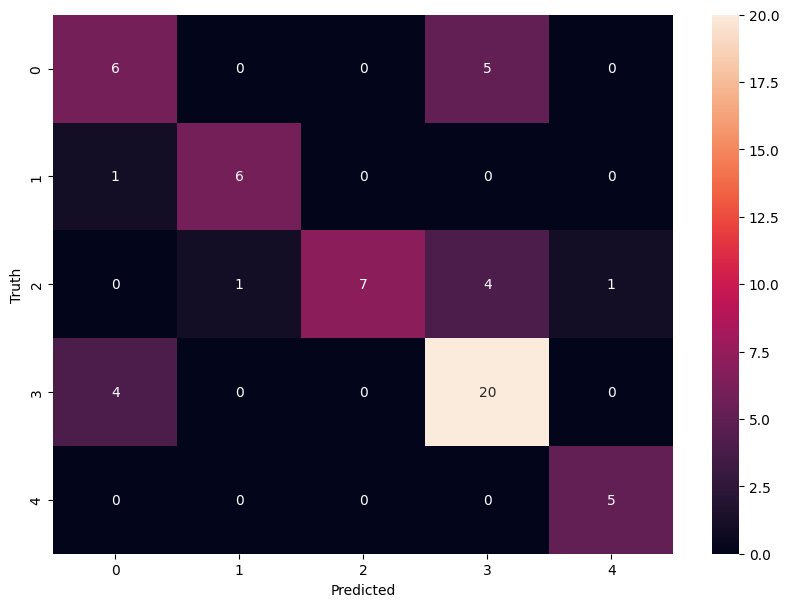

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show();

The model is confused to make a choice between Ekaterina Gamova and Maria Sharapova

In [72]:
# Saving the model

In [73]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [74]:
# Saving the class dictionary

In [75]:
class_dict = {'ekaterina_gamova': 0,
 'fedor_yemelyanenko': 1,
 'kylian_mbappe': 2,
 'maria_sharapova': 3,
 'yusuf_dikec': 4} # added underscores for future web business

In [76]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))